# Different ways for ticks and symbols
Here we introduce different ways to format axis ticks and the corresponding labels. We define our example data as the following:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2, 5)
y = np.exp(x) + x**2

### Formatting Ticks and Symbols
##### Axis and ticks 
In Matplotlib, each axes has attributes xaxis and yaxis. The ticks are contained in Axes instance, just like Axes are contained in Figures
- Each axes has attributes xaxis and yaxis
- Each axes manage major tick and minor tick, minor ticks are not used by default unless in logscale plot
- formatter comes behind ticks: an axis can have ticks but no format, but not the other way. Setting locator to NullLocator also remove any Formatting

##### Setting the ticks and formats
We customize the ticks and formats by specifing the formatter and locator for the major and minor ticks:
- ax.xaxis.get_major_locator()
- ax.xaxis.get_major_formatter()
- ax.yaxis.set_major_locator()
- ax.xaxis.set_major_formatter()

##### A list of formatter and locator
We can find the list of formatter and locators included in Matplotlib: 
- [Locators](https://matplotlib.org/stable/gallery/ticks/tick-locators.html?highlight=fixedlocator); 
- [formatters](https://matplotlib.org/stable/gallery/ticks/tick-formatters.html?highlight=fixedlocator)

Following describes some of the useful locator and formatter. Often, locator and formatter are used together. Their use are provided by examples. 

- **plt.NullLocator()**: remove all ticks on the given axis
- **plt.FixedLocator()** and **plt.FixedFormatter()** put ticks and corresponding symbols only at the given position. 
```
Locator                    Descriptions   
https://matplotlib.org/stable/gallery/ticks/tick-locators.html?highlight=fixedlocator
NullLocator                No ticks
FixedLocator               Tick locations are fixed
IndexLocator               Locator for index plots (e.g., where x = range(len(y)))
LinearLocator              Evenly spaced ticks from min to max
LogLocator                 Logarithmically ticks from min to max
MultipleLocator            Ticks and range are a multiple of base
MaxNLocator(N)             Finds up to a max number of ticks at nice locations
AutoLocator                (Default) MaxNLocatorwith simple defaults
AutoMinorLocator           Locator for minor ticks

Formatter                 
https://matplotlib.org/stable/gallery/ticks/tick-formatters.html?highlight=fixedlocator
NullFormatter              No labels
IndexFormatter             Set strings from a list of labels
FixedFormatter             Set strings manually for labels
FuncFormatter              Use user-defined function to set value
FormatStrFormatter         Use a format string for each value
ScalarFormatter            Default for scalar values
LogFormatter               Default for log axes
```

### Logscale
I use two different ways to plot data in log scale. The first way is to convert data directly into logscale so that the plotting can be done on a normal linear scale axes. The second way is to directly specifies log scale for in the axis settings. 

##### Method 1: using logscale axis setting
In this method, we specify explicitly that we will plot data in logscale using `axs.set_yscale('log')`, which will nicely set the ticks and labels for a logscale plot. This is given in the following example

##### Method 2: converting data to log scale
This method is perhaps somewhat more complicated compared to previous method, but the important thing here is the idea to transform data manually according to your needs. One point to notice is to change the axis label accordingly (from $y$ to $\log_{10}y$). 

This method gives more flexibility for us. For example, if we want to use $\exp y$ instead of $\log_{10}y$ for the y-axis, we can transform data using `np.log(y)` instead of the `np.log10(y)`. Accordingly, we can manually set the axis tics or labels for better effect.

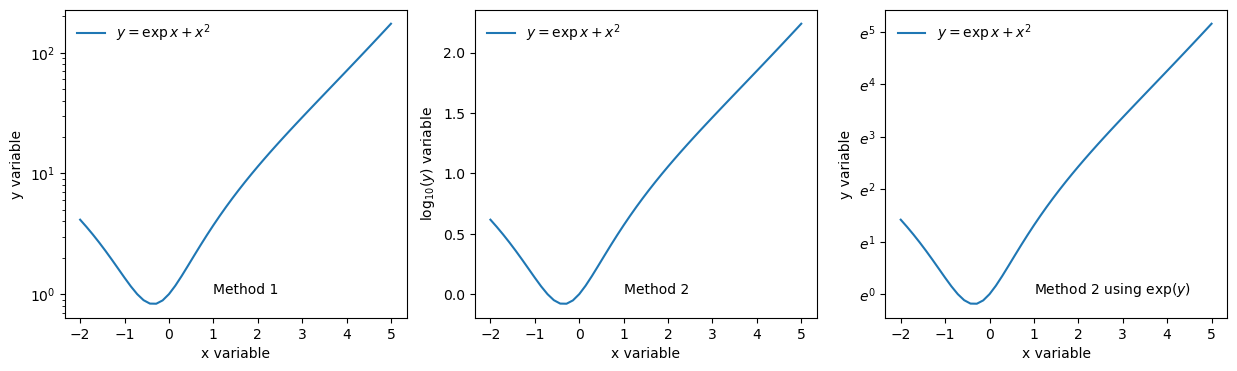

In [2]:
figure = plt.figure(figsize=(15, 4))
axs = figure.subplots(1, 3)

axs[0].set_xlabel("x variable")
axs[0].set_ylabel("y variable")
axs[0].set_yscale("log")
axs[0].plot(x, y, label = r"$y = \exp x + x^2$")
axs[0].legend(frameon = False)
axs[0].text(1, 1, "Method 1")

axs[1].set_xlabel("x variable")
axs[1].set_ylabel(r"$\log_{10}(y)$ variable")
axs[1].plot(x, np.log10(y), label = r"$y = \exp x + x^2$")
axs[1].text(1, 0, "Method 2")
axs[1].legend(frameon = False)

axs[2].set_xlabel("x variable")
axs[2].set_ylabel("y variable")
axs[2].plot(x, np.log(y), label = r"$y = \exp x + x^2$")
axs[2].yaxis.set_major_locator(plt.FixedLocator([0, 1, 2, 3, 4, 5]))
axs[2].yaxis.set_major_formatter(plt.FixedFormatter(['$e^0$', '$e^1$', '$e^2$', '$e^3$', '$e^4$', '$e^5$']))
axs[2].text(1, 0, r"Method 2 using $\exp(y)$")
axs[2].legend(frameon = False)